In [2]:
library(openxlsx)
library(reshape)
library(tidyverse)

library(ggplot2)
library(RColorBrewer)
library(corrplot)

#optimal number of components
library(nFactors)
library(psych)# parallel analysis

# Averaged model of 19 regions

## optimal dimension

In [3]:
plotnScree <-
function (nScree,
          elbow = 3,
          legend = TRUE,
          ylab   = "Eigenvalues",
          xlab   = "Components",
          main   = "Non Graphical Solutions to Scree Test")
          {
   if (!inherits(nScree, "nScree"))  stop("Method is only for nScree objects")
   #if (!exists("legend", mode="logical") ) legend <- TRUE                                   # To develop
   #if (!exists("ylab"))                    ylab <- "Eigenvalues"                            # To develop
   #if (!exists("xlab"))                    xlab <- "Components"                             # To develop
   #if (!exists("main"))                    main <- "Non Graphical Solutions to Scree Test"  # To develop
   if (nScree$Model == "components") nkaiser = "Eigenvalues (>mean  = " else nkaiser = "Eigenvalues (>0 = "
   if (nScree$Model == "factors")  xlab   = "Factors"
   # panel
   par(col   = 1, pch = 1, cex=4)     # Color and symbol for usual scree
   par(mfrow = c(1,1),lwd=2, cex=4)
   eig        <- nScree$Analysis$Eigenvalues
   k          <- 1:length(eig)
   #plotuScree(x=eig, ...)                                                                   # To develop
   plotuScree(x=eig, main=main, xlab=xlab, ylab=ylab,col=2)
   nk         <- length(eig)
   noc        <- nScree$Components$noc
   vp.p       <- lm(eig[c(noc+1,nk)] ~ k[c(noc+1,nk)])
   x          <- sum(c(1,1) * coef(vp.p))
   y          <- sum(c(1,nk)* coef(vp.p))
   par(col = 10, cex=1.8)            # Color for optimal coordinates
   lines(k[c(1,nk)],c(x,y),lwd=1.8)
   par(col = 11,pch=2, cex=1.5)            # Color and symbol for parallel analysis
   lines(1:nk, nScree$Analysis$Par.Analysis, type = "b",lwd=1.8)
   if (legend == TRUE) {
     leg.txt  <- c(paste("Parallel Analysis (n = ",nScree$Components$nparallel,")"),
                 c(paste("Kaiser-Guttman rule (n = ",nScree$Components$nkaiser,")")),
                 c(paste("Cattell’s scree test (n = ",elbow,")")),
                 c(paste("Optimal Coordinates (n = ",nScree$Components$noc,")")) )
     legend("topright",
            legend   = leg.txt,
            pch      = c('△','_','○','_'),
            text.col = c(3,4,1,2), 
            col = c(3,4,1,2),
            cex = 1)
     }
   naf        <-   nScree$Components$naf
   text(x = noc ,    y = eig[noc],     label = " (OC)", cex = 1.2, adj = c(0,0), col = 2)
#    text(x = naf + 1, y = eig[naf + 1], label = " (AF)", cex = .70, adj = c(0,0), col = 4)
   }

In [4]:
dim_rel_scaled = read.csv('input_data/Nations/Total/output_data/Total_scale_var_33v.csv',
                               row.names=1)
# Parallel analysis, Optimal Coordinates, and  Cattell's Scree Test
ev <- eigen(cor(dim_rel_scaled)) # get eigenvalues
ap <- parallel(subject=nrow(dim_rel_scaled),var=ncol(dim_rel_scaled),model="components",rep=5000,cent=.05) 
nS <- nScree(x=ev$values, model = "components",aparallel=ap$eigen$qevpea) # "qevpea" indicate 95 centile given cent=.05 
nS$Analysis$Cumu[1:5]

[1] 0.4468336 0.6682188 0.7547065 0.8145523 0.8669602

png 
  2

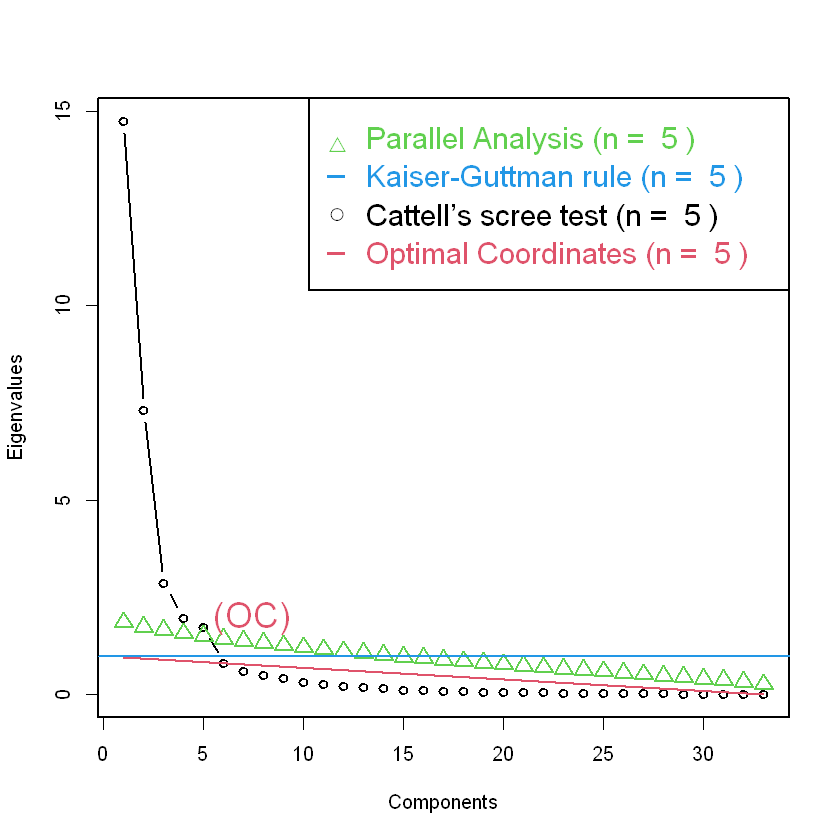

In [5]:
plotnScree(nS, elbow = 5,legend=TRUE, main = NULL)
abline(h = 1, col=4, lty=1,lwd =1.8) # Kaiser-Guttman Rule

png("../output_graph/world_averaged/optimal_components.png",
     family = 'sans',units='in',width=8,height=8,res=300)
plotnScree(nS,elbow = 5, legend=TRUE, main = NULL)
abline(h = 1, col=4, lty=1,lwd =1.8) # Kaiser-Guttman Rule
dev.off()

## plot loading

### colorful

In [6]:
# pca_5c_33d_loadings_total = read.csv('input_data/Nations/Total/pca_results/Total_loadings_var_5c_33d.csv',row.names=1)
# loadings_var = pca_5c_33d_loadings_total
# loadings_var_reorder = as.data.frame(loadings_var[,1:5])
# colnames(loadings_var_reorder) = c('Activeness','Exchange','Formality','Equality','Valence')
# loadings_var_reorder['Formality'] = -loadings_var_reorder['Formality']
# loadings_var_reorder['Activeness'] = -loadings_var_reorder['Activeness']
# loadings_var_reorder['Valence'] = -loadings_var_reorder['Valence']
# loadings_var_reorder = loadings_var_reorder[,
#                         c('Formality','Activeness','Valence','Exchange','Equality')]

# #filter each row's max loading, and attribute it to correspnding column.
# order_list = c()
# for (row in c(1:33)){
#     temp_max = abs(loadings_var_reorder[row,1])
#     n = 1
#     for (col in c(2:5)){
#         temp = abs(loadings_var_reorder[row,col])
#         if (temp > temp_max){
#             temp_max = temp
#             n = col
#         }
        
#     }
#     order_list[row] = n
# }
# loadings_var_reorder = loadings_var_reorder %>% mutate(order = order_list)
# loadings_var_reorder['rel'] = rownames(loadings_var_reorder)
# RC1 = loadings_var_reorder %>% filter(order==1) %>% arrange(desc(Formality))
# RC2 = loadings_var_reorder %>% filter(order==2) %>% arrange(desc(Activeness))
# RC3 = loadings_var_reorder %>% filter(order==3) %>% arrange(desc(Valence))
# RC4 = loadings_var_reorder %>% filter(order==4) %>% arrange(desc(Exchange))
# RC5 = loadings_var_reorder %>% filter(order==5) %>% arrange(desc(Equality))
# rownames(loadings_var_reorder) = loadings_var_reorder$'rel'

# loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
# loadings_var_reorder = loadings_var_reorder[1:5]

# options(repr.plot.width=6, repr.plot.height=10)
# my.breaks = c(seq(-1,1,by=0.01))
# corrplot(as.matrix(loadings_var_reorder),is.corr=FALSE,
#          tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
#          col.lim = c(-1,1),cl.ratio = 0.4,cl.cex=1,
#          col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))

### abs

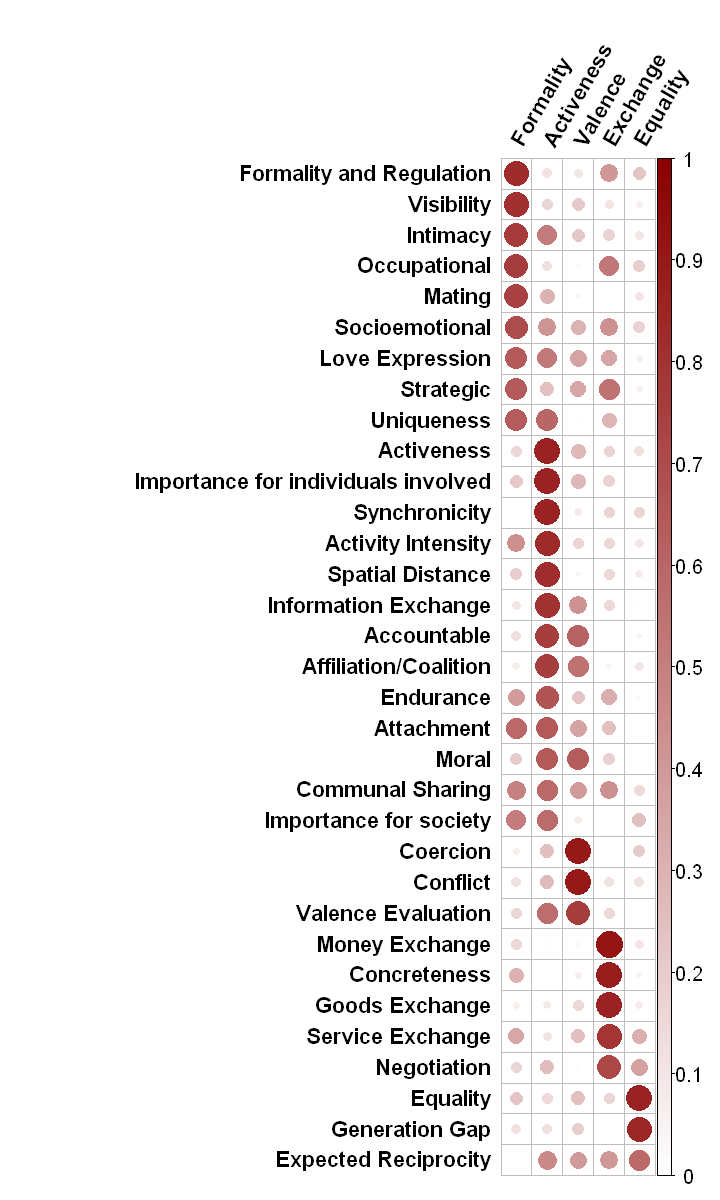

In [7]:
pca_5c_33d_loadings_total = read.csv('input_data/Nations/Total/pca_results/Total_loadings_var_5c_33d.csv',row.names=1)
loadings_var = pca_5c_33d_loadings_total
loadings_var_reorder = as.data.frame(loadings_var[,1:5])
colnames(loadings_var_reorder) = c('Activeness','Exchange','Formality','Equality','Valence')
# loadings_var_reorder['Formality'] = -loadings_var_reorder['Formality']
# loadings_var_reorder['Activeness'] = -loadings_var_reorder['Activeness']
# loadings_var_reorder['Valence'] = -loadings_var_reorder['Valence']
loadings_var_reorder = abs(loadings_var_reorder)
loadings_var_reorder = loadings_var_reorder[,
                        c('Formality','Activeness','Valence','Exchange','Equality')]

#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:33)){
    temp_max = abs(loadings_var_reorder[row,1])
    n = 1
    for (col in c(2:5)){
        temp = abs(loadings_var_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
        }
        
    }
    order_list[row] = n
}
loadings_var_reorder = loadings_var_reorder %>% mutate(order = order_list)
loadings_var_reorder['rel'] = rownames(loadings_var_reorder)
RC1 = loadings_var_reorder %>% filter(order==1) %>% arrange(desc(Formality))
RC2 = loadings_var_reorder %>% filter(order==2) %>% arrange(desc(Activeness))
RC3 = loadings_var_reorder %>% filter(order==3) %>% arrange(desc(Valence))
RC4 = loadings_var_reorder %>% filter(order==4) %>% arrange(desc(Exchange))
RC5 = loadings_var_reorder %>% filter(order==5) %>% arrange(desc(Equality))
rownames(loadings_var_reorder) = loadings_var_reorder$'rel'

loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
loadings_var_reorder = loadings_var_reorder[1:5]

options(repr.plot.width=6, repr.plot.height=10)
my.breaks = c(seq(-1,1,by=0.01))
corrplot(as.matrix(abs(loadings_var_reorder)),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(0,1),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(c("white","darkred"))(length(my.breaks)))

In [8]:
png("../output_graph/world_averaged/loadings.png", bg="transparent",
    family = 'sans',units='in',width=6,height=10,res=300)
pca_5c_33d_loadings_total = read.csv('input_data/Nations/Total/pca_results/Total_loadings_var_5c_33d.csv',row.names=1)
loadings_var = pca_5c_33d_loadings_total
loadings_var_reorder = as.data.frame(loadings_var[,1:5])
colnames(loadings_var_reorder) = c('Activeness','Exchange','Formality','Equality','Valence')
loadings_var_reorder = abs(loadings_var_reorder)
loadings_var_reorder = loadings_var_reorder[,
                        c('Formality','Activeness','Valence','Exchange','Equality')]

#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:33)){
    temp_max = abs(loadings_var_reorder[row,1])
    n = 1
    for (col in c(2:5)){
        temp = abs(loadings_var_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
        }
        
    }
    order_list[row] = n
}
loadings_var_reorder = loadings_var_reorder %>% mutate(order = order_list)
loadings_var_reorder['rel'] = rownames(loadings_var_reorder)
RC1 = loadings_var_reorder %>% filter(order==1) %>% arrange(desc(Formality))
RC2 = loadings_var_reorder %>% filter(order==2) %>% arrange(desc(Activeness))
RC3 = loadings_var_reorder %>% filter(order==3) %>% arrange(desc(Valence))
RC4 = loadings_var_reorder %>% filter(order==4) %>% arrange(desc(Exchange))
RC5 = loadings_var_reorder %>% filter(order==5) %>% arrange(desc(Equality))
rownames(loadings_var_reorder) = loadings_var_reorder$'rel'

loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
loadings_var_reorder = loadings_var_reorder[1:5]

options(repr.plot.width=6, repr.plot.height=10)
my.breaks = c(seq(-1,1,by=0.01))
corrplot(as.matrix(abs(loadings_var_reorder)),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(0,1),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(c("white","darkred"))(length(my.breaks)))
dev.off()

png 
  2

## import relationship scores

In [9]:
pca_5c_33d_scores_total = read.csv('input_data/Nations/Total/pca_results/Total_scores_var_5c_33d.csv',row.names=1) 
colnames(pca_5c_33d_scores_total) = c('Activeness','Exchange','Formality','Equality','Valence')
# the two dimensions are reversed
pca_5c_33d_scores_total['Activeness'] = -pca_5c_33d_scores_total['Activeness']
pca_5c_33d_scores_total['Formality'] = -pca_5c_33d_scores_total['Formality']
pca_5c_33d_scores_total['Valence'] = -pca_5c_33d_scores_total['Valence']
FAVEE = c('Formality','Activeness','Valence','Exchange','Equality')
pca_5c_33d_scores_total = pca_5c_33d_scores_total[,FAVEE]

# Each model in 19 nations

In [12]:
file_path = 'output_data/pca_results/'

relationship_score_list = list()
for (region in dir(file_path)){
    file = paste(file_path,region,sep='')
    file = paste(paste(file,'/',sep=''),region,sep='')
    file = paste(file,'_scores_var_5c_33d.csv',sep='')
    favee_df = read.csv(file,row.names=1)
    
    region = gsub('HK','HK(region)',region) 
    region = gsub('South_africa','South Africa',region)
    relationship_score_list[[region]] = favee_df}

In [14]:
# Organize relationship score
regions = c(
    # English
    'USA','UK','Australia','South Africa',
    # Germany
    'Germany',
    # Japanese
    'Japan',
    # Hebrew
    'Israel',
    # Chinese
    'CHN','HK(region)',

    # French
    'France',
    # Spanish
    'Spain','Mexico','Chile',
    # Portuguese
    'Portugal','Brazil',
    # Russian
    'Russia',
    # Arabic
    'Egypt','Qatar',
    'India')

In [15]:
# summarise model labels
model_label_df = read.xlsx('input_data/dimensions_check.xlsx',
                           sheet='Model_33d_5c')
model_label_df = rename(model_label_df,c('South Africa'='South.Africa'))
model_label_df = model_label_df[1:5,regions]
# transform dataframe into dictionary(list)
model_label_list = as.list(model_label_df)

# add model labal to raw models
relationship_score_name_list = list()
for (region in names(model_label_list)){
    # grab the model labels
    model_label = model_label_list[[region]]
    reverse = rep(1,5)
    col_numbers = seq(1,5)
#     if (region %in% c('France','Mexico','Portugal')){
#         reverse = rep(1,4)
#         model_label = model_label[1:4]
#         col_numbers = seq(1,4)
#     }
    count = 1
    for (label in model_label){
        # label of one dimension
        temp = strsplit(label,'(',fixed = TRUE)[[1]]
        model_label[count] = temp[1]
        
        if (!is.na(temp[2])){
            # whether the dimension required to be reversed or not
            reverse[count] = -1
        }
        
        count = count + 1
    }
    region_df = relationship_score_list[[region]]
    colnames(region_df) = model_label
    # reverse the column
    for (col in col_numbers){region_df[col] = region_df[col]*reverse[col]}
    relationship_score_name_list[[region]] = region_df
    
    print(region)
    print(reverse)
}

[1] "USA"
[1] -1  1 -1  1  1
[1] "UK"
[1]  1 -1 -1 -1  1
[1] "Australia"
[1]  1  1 -1  1  1
[1] "South Africa"
[1] -1  1  1 -1 -1
[1] "Germany"
[1]  1  1 -1 -1  1
[1] "Japan"
[1] -1  1  1 -1  1
[1] "Israel"
[1] -1  1 -1 -1  1
[1] "CHN"
[1] -1  1  1  1 -1
[1] "HK(region)"
[1] -1  1  1  1  1
[1] "France"
[1]  1 -1 -1  1  1
[1] "Spain"
[1] -1  1 -1  1  1
[1] "Mexico"
[1] -1  1  1  1 -1
[1] "Chile"
[1] 1 1 1 1 1
[1] "Portugal"
[1]  1  1  1 -1 -1
[1] "Brazil"
[1] -1  1  1 -1 -1
[1] "Russia"
[1] -1 -1 -1 -1 -1
[1] "Egypt"
[1] -1  1 -1 -1 -1
[1] "Qatar"
[1] -1  1  1  1 -1
[1] "India"
[1]  1  1 -1 -1  1


In [16]:
# Adjust the order of dimensions to be consistent FAVEE
FAVEE = c('Formality','Activeness','Valence','Exchange','Equality')
relationship_FAVEE_list = list()
for (region in names(relationship_score_name_list)){
    temp_df = relationship_score_name_list[[region]]
    if (region %in% c('USA','UK','South Africa','Australia','Germany',
                      'CHN','HK(region)','Israel','Brazil','Japan','Spain',
                      'France','Mexico','Portugal','Chile'))
    {temp_df = temp_df[,FAVEE]
     #col_name = paste(region,FAVEE)
     #colnames(temp_df) = col_name
    }
#     if (region %in% 'Chile')
#     {temp_df = temp_df[,c('Formality','V1','Valence','V3','Equality')]
#     }

    else if (region %in% c('Russia','Egypt','Qatar','India'))
    {temp_df = temp_df[,c('Formality','Activeness','Valence','Exchange','Socioemotional')]
     #col_name = paste(region,c('Formality','Activeness','Valence','Exchange','Socioemotional'))
     #colnames(temp_df) = col_name
    }
    relationship_FAVEE_list[[region]] = temp_df
}

# Correlation of each region and averaged regions in each dimension

In [17]:
dimension_region_list = {}
for (region in names(relationship_FAVEE_list)){
    # caculate correlation of each region's 5 dimensions and the average total model
    region_df = relationship_FAVEE_list[region]
    region_total = cbind(region_df,pca_5c_33d_scores_total)
    region_total_cor = cor(region_total, method='spearman')
    region_total_cor = region_total_cor[6:10,1:5]
    
    # contain resutls in dictionary
    dimension_region_list[[region]] = region_total_cor
}

# Plot results

In [18]:
options (warn = -1) # remove warning
all_results_df = data.frame()
for (region in names(dimension_region_list)){
    region_df = dimension_region_list[[region]]
    # unify the labels in x axis
    colnames(region_df) = paste('RC',seq(1,5),sep='')

    region_df = melt(region_df) %>% rename('total'='X1','region'='X2')
    region_df['region_label'] = region
    
    all_results_df = rbind(all_results_df,region_df)
}
all_results_df$region_label = factor(all_results_df$region_label,
levels = c('Australia','Brazil','CHN','Chile','France','Germany','HK(region)',
           'Israel','Japan','Mexico','Portugal',
           'South Africa','Spain','UK','USA',

           'Egypt','India','Qatar','Russia'
           ))
head(all_results_df,3)

,total,region,value,region_label
,<fct>,<fct>,<dbl>,<fct>
1,Formality,RC1,0.88112610,USA
2,Activeness,RC1,-0.07535825,USA
3,Valence,RC1,-0.18961667,USA


png 
  2

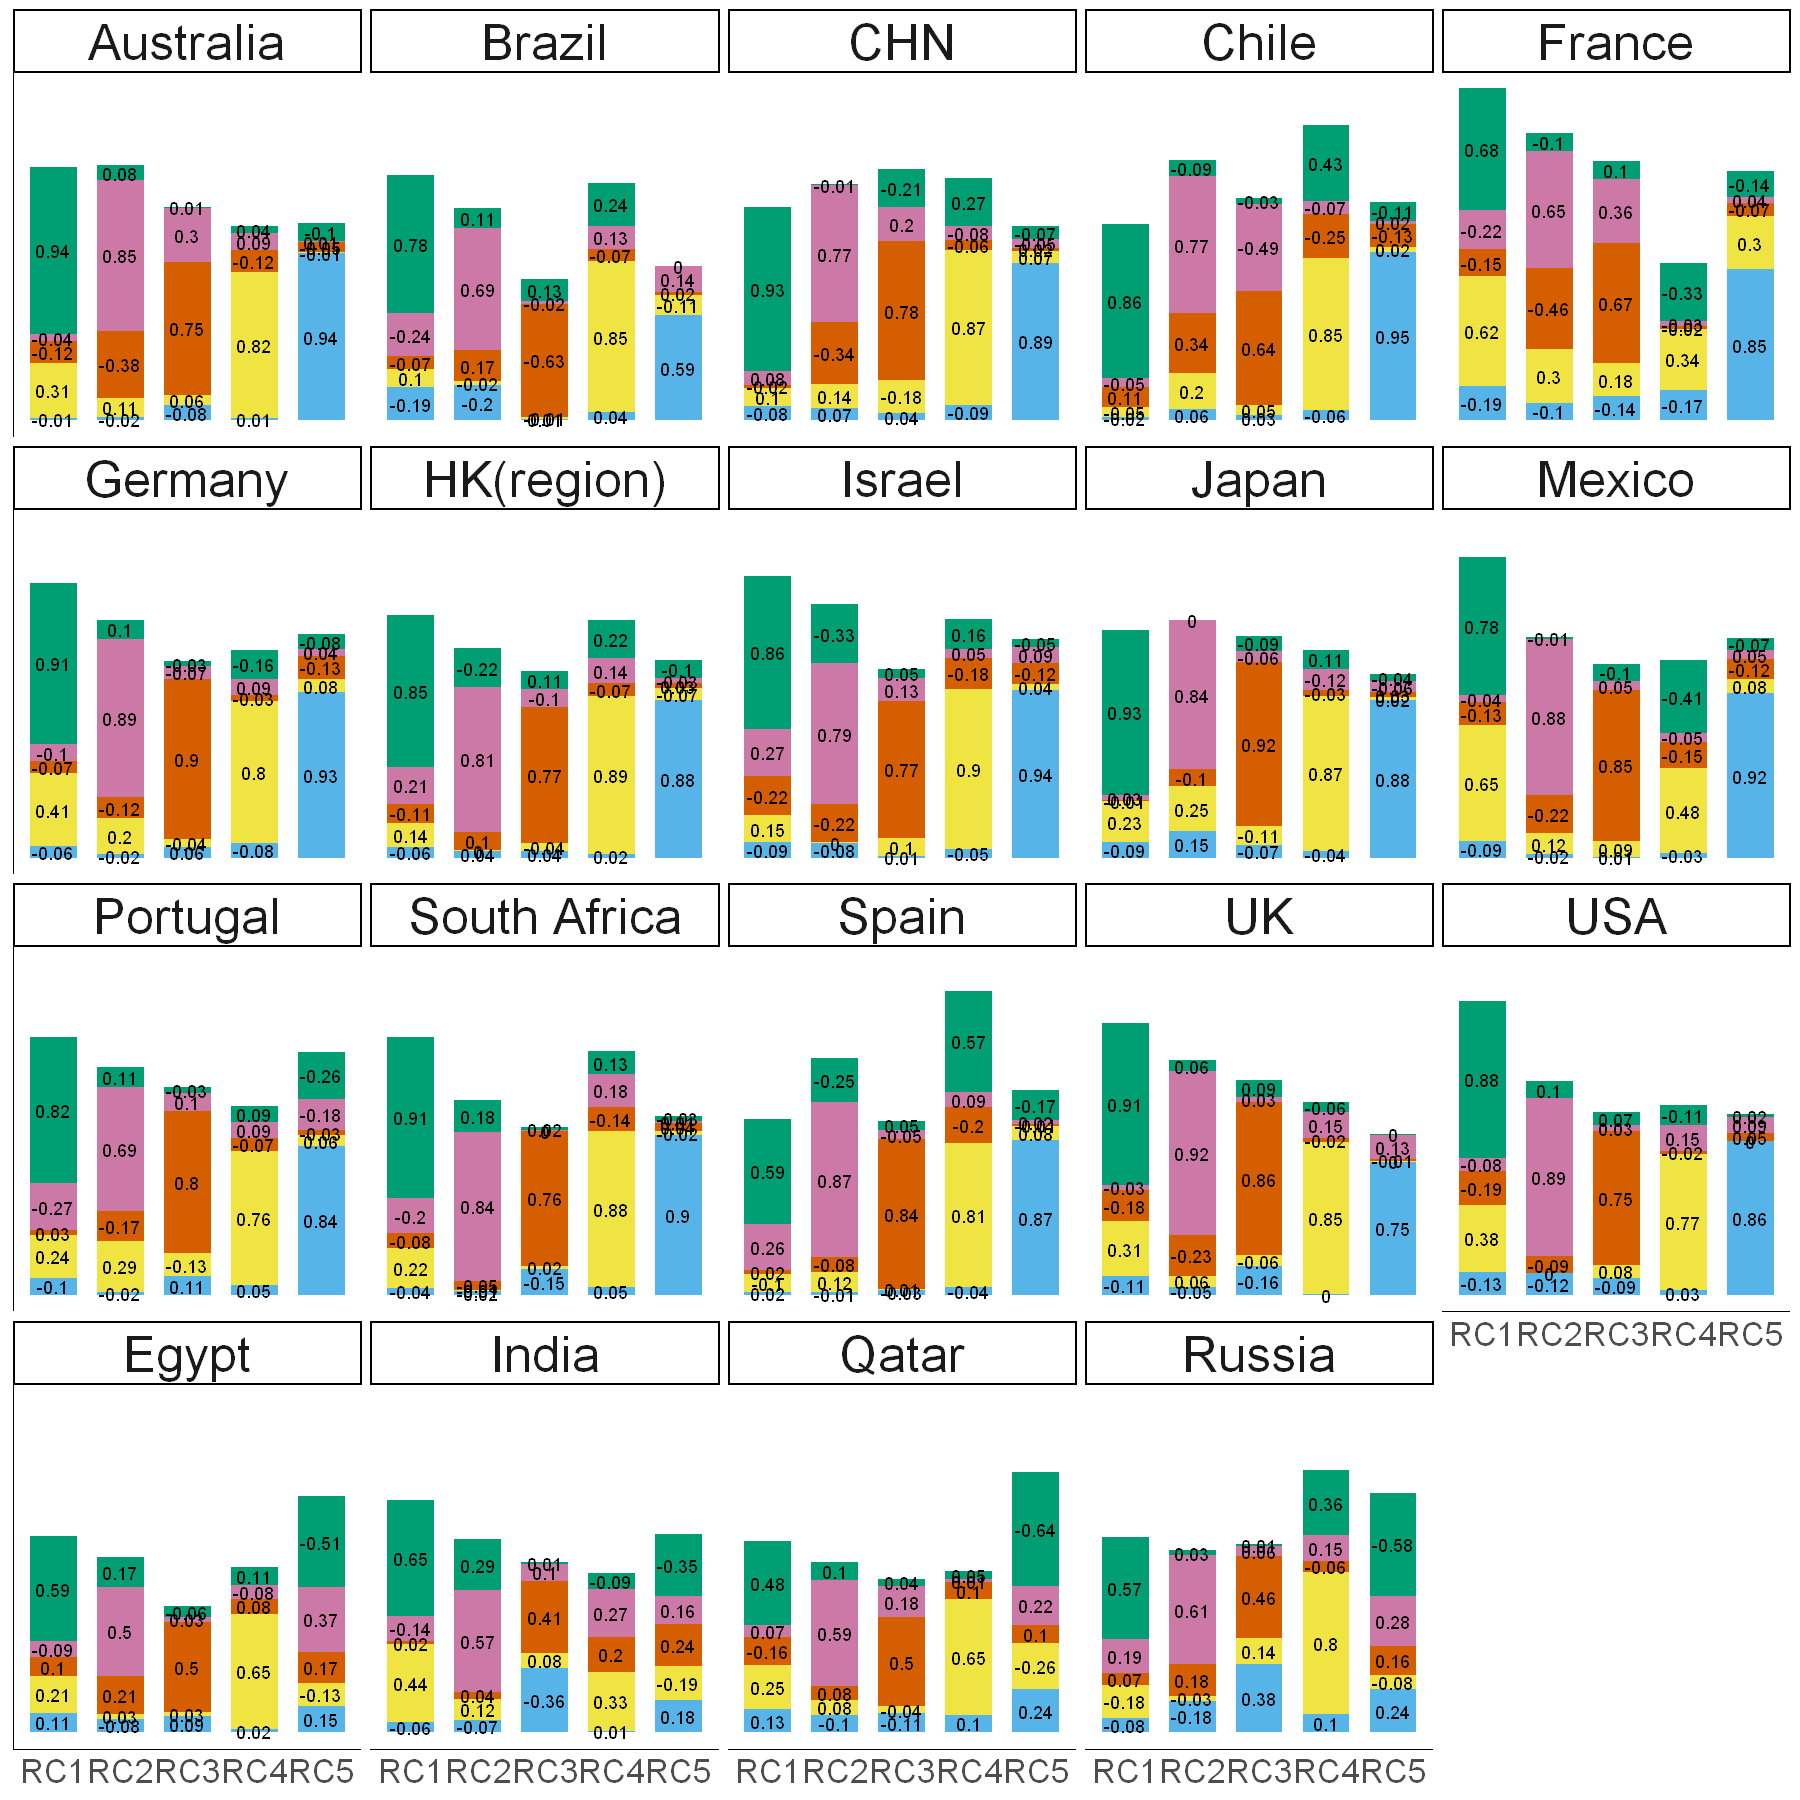

In [20]:
options(repr.plot.width=15,repr.plot.height=15)
all_results_df  %>%
ggplot(aes(x=region,y=abs(value),fill=total))+
geom_bar(stat='identity', width=0.7)+
facet_wrap(region_label~.,ncol=5)+
geom_text(aes(label=round(value,2)),position=position_stack(vjust=0.5))+
scale_fill_manual(values=c('Formality'='#009E73','Activeness'='#CC79A7',
                           'Valence'='#D55E00','Exchange'='#F0E442','Equality'='#56B4E9'))+
theme_classic()+
theme(legend.position='none',
      axis.text.x = element_text(size=20),
      axis.text.y = element_blank(),axis.ticks = element_blank(),
      strip.text = element_text(size=30),
      axis.title = element_blank())

#################################################
png("../output_graph/world_averaged/MeaningOf33D.png", bg="transparent",
    family = 'sans',units='in',width=15,height=15,res=300)

all_results_df  %>%
ggplot(aes(x=region,y=abs(value),fill=total))+
geom_bar(stat='identity', width=0.7)+
facet_wrap(region_label~.,ncol=5)+
geom_text(aes(label=round(value,2)),position=position_stack(vjust=0.5))+
scale_fill_manual(values=c('Formality'='#009E73','Activeness'='#CC79A7',
                           'Valence'='#D55E00','Exchange'='#F0E442','Equality'='#56B4E9'))+
theme_classic()+
theme(legend.position='none',
      axis.text.x = element_blank(),panel.spacing = unit(2,"lines"),
      axis.text.y = element_blank(),axis.ticks = element_blank(),
      axis.line = element_line(color='white'),
      strip.text = element_text(color='white',size=30),
      axis.title = element_blank())
dev.off()